<a href="https://colab.research.google.com/github/brunacpg/mvp-saude-mental/blob/main/mvp_mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Bruna Cristina Peixoto Gonçalves

**Matrícula:** 4052024002496

**Dataset:** [Mental Health in Tech Survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey)



# Descrição do Problema

A saúde mental vem ganhando cada vez mais atenção no ambiente corporativo, especialmente no setor de tecnologia, onde a rotina costuma ser marcada por alta pressão, jornadas longas e constante exigência por inovação. Este projeto tem como propósito explorar e preparar os dados de uma pesquisa realizada em 2014 com profissionais da área, buscando compreender melhor:

- A incidência de problemas relacionados à saúde mental nesse campo

- Como empregadores e colaboradores lidam com o tema

- Quais padrões ou fatores podem influenciar a decisão de buscar tratamento

Trata-se de um problema de aprendizado supervisionado, com foco inicial na variável treatment — que indica se a pessoa já procurou ou não atendimento especializado. Embora o objetivo a longo prazo seja desenvolver um modelo preditivo capaz de identificar quem tem maior chance de buscar tratamento, nesta primeira fase (MVP) o foco está apenas na análise exploratória e no pré-processamento dos dados.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Pessoas com histórico familiar de doenças mentais são mais propensas a buscar tratamento.

- A cultura organizacional (benefícios, apoio, anonimato) impacta na decisão de tratar.

- A idade, gênero e regime de trabalho (remoto ou presencial) podem influenciar nas respostas.

##Tipo de Problema

Este é um problema de classificação supervisionada.
Dado um conjunto de características relacionadas ao perfil do participante (como idade, gênero, histórico familiar de saúde mental, condições de trabalho e benefícios oferecidos pela empresa), o objetivo é prever se essa pessoa já buscou ou não tratamento para uma condição de saúde mental, representado pela variável-alvo treatment, que possui dois possíveis valores: "Yes" (procurou tratamento) e "No" (não procurou tratamento).

## Seleção dos dados

O dataset Mental Health in Tech Survey foi coletado por meio de um formulário online promovido pela organização OSMI (Open Sourcing Mental Illness), e reúne respostas de profissionais do setor de tecnologia sobre saúde mental no ambiente de trabalho.

Foi necessário realizar uma etapa de seleção e limpeza inicial, com os seguintes critérios:

- Foram mantidos apenas os atributos relevantes para a análise e futura previsão da variável treatment.

- Atributos puramente descritivos, como Timestamp (data de resposta) e comments (campo aberto de texto), foram removidos.

- Como cada linha representa um indivíduo único, não foi necessário aplicar amostragem, e todo o conjunto foi mantido para preservar a diversidade das respostas.

## Atributos do Dataset
O dataset Mental Health in Tech Survey contém informações coletadas em uma pesquisa sobre saúde mental de profissionais da área de tecnologia. Cada linha representa as respostas de um participante. Abaixo estão os principais atributos disponíveis:

| Atributo                    | Tipo       | Descrição                                                                    |
| --------------------------- | ---------- | ---------------------------------------------------------------------------- |
| `Timestamp`                 | string     | Data e hora em que o participante respondeu à pesquisa                       |
| `Age`                       | numérico   | Idade do participante                                                        |
| `Gender`                    | string     | Identidade de gênero do participante                                         |
| `Country`                   | string     | País de residência                                                           |
| `state`                     | string     | Estado (caso resida nos EUA)                                                 |
| `self_employed`             | categórico | Se o participante é autônomo                                                 |
| `family_history`            | categórico | Se possui histórico familiar de doença mental                                |
| `treatment`                 | categórico | Se já buscou tratamento para saúde mental                                    |
| `work_interfere`            | categórico | Se uma condição mental interfere no trabalho                                 |
| `no_employees`              | categórico | Número de funcionários da empresa                                            |
| `remote_work`               | categórico | Se trabalha remotamente (>=50% do tempo)                                     |
| `tech_company`              | categórico | Se a empresa é do setor de tecnologia                                        |
| `benefits`                  | categórico | Se a empresa oferece benefícios de saúde mental                              |
| `care_options`              | categórico | Se o participante conhece as opções de cuidado oferecidas                    |
| `wellness_program`          | categórico | Se a empresa promove programas de bem-estar                                  |
| `seek_help`                 | categórico | Se há recursos para buscar ajuda dentro da empresa                           |
| `anonymity`                 | categórico | Se a empresa garante anonimato ao buscar tratamento                          |
| `leave`                     | categórico | Facilidade de tirar licença médica para saúde mental                         |
| `mental_health_consequence` | categórico | Se falar sobre saúde mental gera consequências                               |
| `phys_health_consequence`   | categórico | Se falar sobre saúde física gera consequências                               |
| `coworkers`                 | categórico | Se sente confortável em falar com colegas sobre saúde mental                 |
| `supervisor`                | categórico | Se sente confortável em falar com supervisores sobre saúde mental            |
| `mental_health_interview`   | categórico | Se mencionaria saúde mental em uma entrevista                                |
| `phys_health_interview`     | categórico | Se mencionaria saúde física em uma entrevista                                |
| `mental_vs_physical`        | categórico | Se acredita que a empresa trata saúde mental com a mesma seriedade da física |
| `obs_consequence`           | categórico | Se já observou colegas sofrerem consequências por questões de saúde mental   |
| `comments`                  | texto      | Comentários adicionais (texto livre)                                         |


## Importação das Bibliotecas Necessárias e Carga de Dados

Nesta etapa, importamos as bibliotecas essenciais para a análise de dados, visualização e manipulação do dataset. Também realizamos a leitura do arquivo .csv após a descompactação do archive.zip que foi previamente carregado no Google Colab.



## Bibliotecas utilizadas

- pandas: para manipulação e análise de dados tabulares

- numpy: para operações matemáticas básicas

- matplotlib e seaborn: para criação de gráficos e visualizações

- os e zipfile: para manipulação de arquivos e extração do .zip

## Código:

In [75]:
# Bibliotecas para análise e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
files.download(csv_path)

# Bibliotecas auxiliares para arquivos
import os
import zipfile

# Caminho do arquivo .zip (após upload manual no Colab)
zip_path = "/content/archive.zip"

# Criar pasta para extração
extract_path = "/content/mental_health_data"
os.makedirs(extract_path, exist_ok=True)

# Descompactar o arquivo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verificar arquivos extraídos
print("Arquivos extraídos:", os.listdir(extract_path))

# Carregar o CSV no DataFrame
csv_path = os.path.join(extract_path, "survey.csv")
df = pd.read_csv(csv_path)

# Visualizar as primeiras linhas
df.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Arquivos extraídos: ['survey.csv']


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [77]:
import pandas as pd

url = "https://raw.githubusercontent.com/brunacpg/mvp-saude-mental/refs/heads/main/survey.csv"
df = pd.read_csv(url)


 ## Análise de Dados

Nesta etapa de Análise Exploratória de Dados (EDA) sobre o dataset Mental Health in Tech Survey, buscamos compreender a distribuição das variáveis, identificar padrões e possíveis inconsistências, além de avaliar a relação entre os atributos e a variável-alvo treatment.

A EDA é uma etapa fundamental antes do pré-processamento e modelagem, pois permite gerar hipóteses, detectar valores atípicos, visualizar a presença de dados ausentes e guiar decisões de transformação de dados com base em evidências.

Serão analisados:

- Estatísticas descritivas das variáveis numéricas

- Distribuições das variáveis categóricas

- Frequência da variável-alvo treatment

- Visualizações gráficas para facilitar a interpretação dos dados

## Total e Tipo das Instâncias

O dataset Mental Health in Tech Survey possui 1259 instâncias (observações), cada uma representando a resposta de um profissional do setor de tecnologia a uma série de perguntas relacionadas à saúde mental no ambiente de trabalho.

As variáveis do dataset incluem:

Variáveis numéricas:

- Age: idade do participante (tipo int ou float)

- Variáveis categóricas (objetos/strings):

- Gender, Country, state, self_employed, family_history, treatment, work_interfere, remote_work, tech_company, benefits, entre outras.

- A variável-alvo treatment também é categórica, com duas classes:

- "Yes" (o participante já buscou tratamento)

- "No" (o participante nunca buscou tratamento)

A análise dessas instâncias nos permite investigar quais fatores podem estar associados à busca por tratamento de saúde mental nesse contexto profissional.

In [35]:
# Exibe o total de registros (instâncias)
print(f"Total de instâncias: {len(df)}")

# Exibe o tipo de dados de cada coluna e total de não-nulos
print("\nTipos de dados por coluna:")
df.info()


Total de instâncias: 1259

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_opti

## Distribuição da Variável Alvo (treatment)

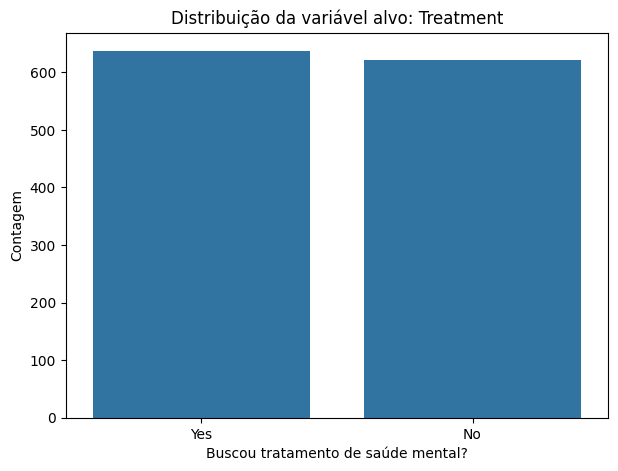

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.countplot(x='treatment', data=df)
plt.title('Distribuição da variável alvo: Treatment')
plt.xlabel('Buscou tratamento de saúde mental?')
plt.ylabel('Contagem')
plt.show()


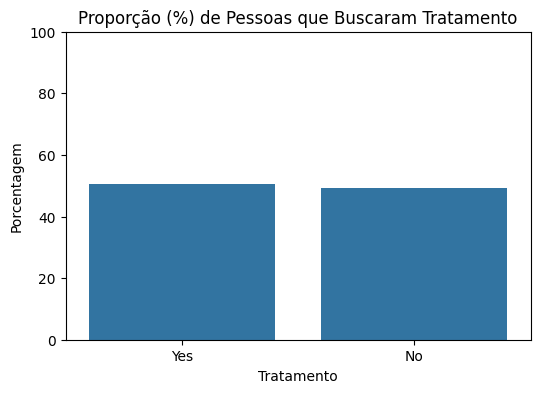

In [38]:
## Mostra a proporção de respostas "Yes" e "No"

treatment_pct = df['treatment'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=treatment_pct.index, y=treatment_pct.values)
plt.title('Proporção (%) de Pessoas que Buscaram Tratamento')
plt.ylabel('Porcentagem')
plt.xlabel('Tratamento')
plt.ylim(0, 100)
plt.show()


## Interpretação do gráfico:

O gráfico de barras acima apresenta a proporção de participantes que já buscaram tratamento para saúde mental em comparação àqueles que não buscaram.

Observa-se que o dataset está relativamente balanceado entre as duas classes, com cerca de 50% dos respondentes afirmando que já buscaram tratamento ("Yes") e os outros 50% indicando que não ("No").

Esse balanceamento é positivo do ponto de vista de modelagem supervisionada, pois evita a necessidade imediata de técnicas de balanceamento como oversampling ou undersampling.



In [41]:
## Distribuição de tratamento por gênero, Revela se há diferença no comportamento entre gêneros:

# Padronização dos valores de gênero
def clean_gender(g):
    g = str(g).lower().strip()
    if 'male' in g and 'trans' not in g:
        return 'Male'
    elif 'female' in g and 'trans' not in g:
        return 'Female'
    else:
        return 'Other'

# Aplica a função e cria nova coluna
df['Gender_clean'] = df['Gender'].apply(clean_gender)

# Verifica se a nova coluna foi criada corretamente
df['Gender_clean'].value_counts()


,count
Gender_clean,
Male,1020
Other,239


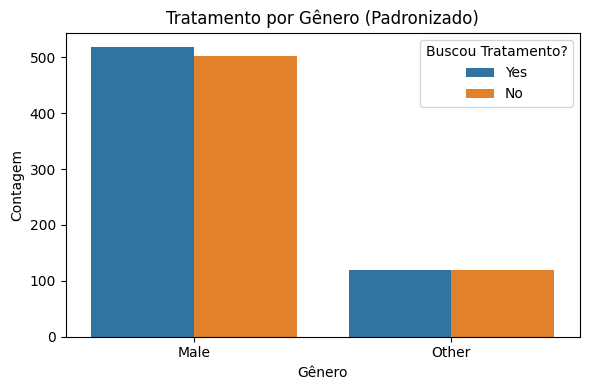

In [42]:
# Gerar o gráfico com a nova coluna
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender_clean', hue='treatment')
plt.title('Tratamento por Gênero (Padronizado)')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Buscou Tratamento?')
plt.tight_layout()
plt.show()

## Interpretação do gráfico:

O gráfico de barras acima mostra a distribuição de pessoas que buscaram ou não tratamento para saúde mental, segmentadas por gênero padronizado.

A padronização foi aplicada para agrupar variações de escrita como "male", "Male", "cis male", etc., sob a categoria comum "Male", e o mesmo para "Female". As demais respostas menos frequentes e mais variadas foram agrupadas na categoria "Other".

Observa-se que a maioria dos participantes se identifica como "Male", seguido por um grupo significativamente menor em "Other" (que inclui não binários, trans, e gêneros diversos).

Além disso, nota-se que a proporção de pessoas que buscaram tratamento entre os gêneros é semelhante, especialmente no grupo "Male", indicando que gênero pode não ser um fator determinante isolado para a busca por tratamento, mas pode se tornar relevante quando combinado com outras variáveis como benefícios oferecidos ou histórico familiar.

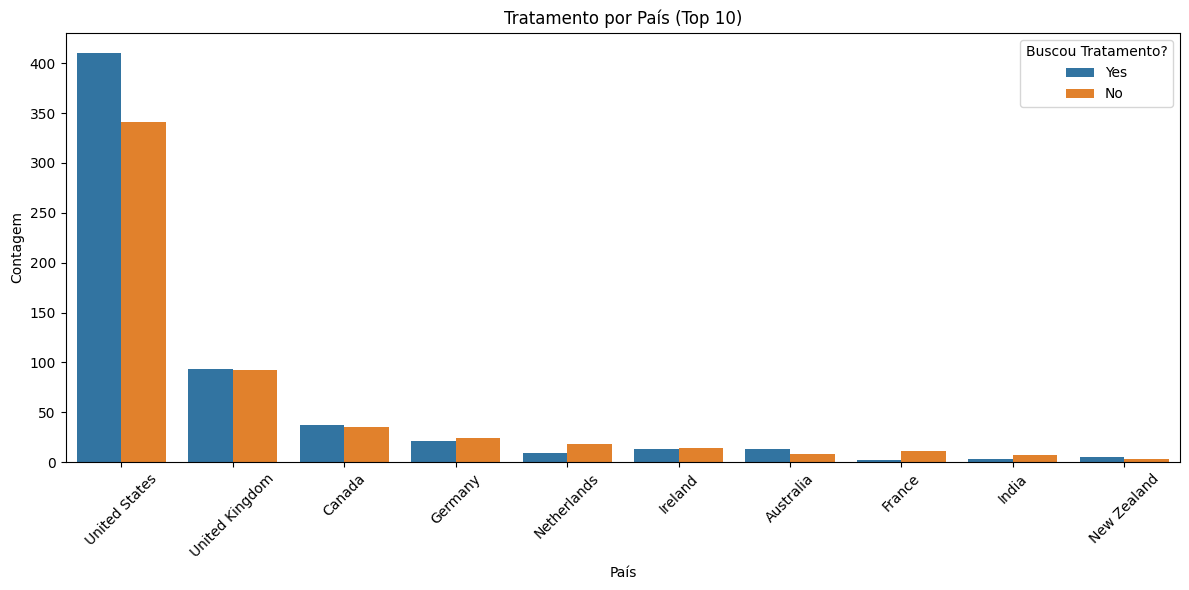

In [45]:
# Distribuição de tratamento por país (Top 10)

top_paises = df['Country'].value_counts().nlargest(10).index
df_top = df[df['Country'].isin(top_paises)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='Country', hue='treatment', order=top_paises)
plt.title('Tratamento por País (Top 10)')
plt.xticks(rotation=45)
plt.ylabel('Contagem')
plt.xlabel('País')
plt.legend(title='Buscou Tratamento?')
plt.tight_layout()
plt.show()



## Interpretação do gráfico:

O gráfico acima apresenta a distribuição das respostas à variável treatment nos 10 países com maior número de participantes na pesquisa.

Observa-se que os Estados Unidos concentram a maior parte das respostas, com destaque para uma proporção significativa de participantes que afirmaram ter buscado tratamento para saúde mental. O Reino Unido e o Canadá aparecem em seguida, com distribuições mais equilibradas entre as respostas "Yes" e "No".

Países com menor número de respostas, como França, Índia e Nova Zelândia, apresentam contagens mais baixas, o que exige cautela na generalização de qualquer padrão observado.

Este tipo de análise por país pode fornecer insights sobre diferenças culturais, acesso a serviços de saúde mental ou políticas institucionais, e pode ser cruzada futuramente com outras variáveis, como benefícios oferecidos pelas empresas e facilidade de tirar licença médica.

# Estatísticas Descritivas
Estatísticas descritivas fornecem um resumo das características numéricas do dataset, permitindo uma compreensão inicial da distribuição dos dados.
Elas incluem medidas como média, desvio padrão, mínimo, máximo e quartis, que ajudam a identificar a presença de outliers, assimetrias e a faixa de valores das variáveis.

Como o dataset possui apenas uma variável numérica (Age), focaremos a análise estatística nela.

In [47]:
# Estatísticas descritivas básicas para variáveis numéricas
df.describe()

print(f"Média de idade: {df['Age'].mean():.2f}")
print(f"Mediana de idade: {df['Age'].median()}")
print(f"Moda de idade: {df['Age'].mode()[0]}")
print(f"Desvio padrão da idade: {df['Age'].std():.2f}")
print(f"Idade mínima: {df['Age'].min()}")
print(f"Idade máxima: {df['Age'].max()}")


Média de idade: 79428148.31
Mediana de idade: 31.0
Moda de idade: 29
Desvio padrão da idade: 2818299442.98
Idade mínima: -1726
Idade máxima: 99999999999


## Histograma com linha da média

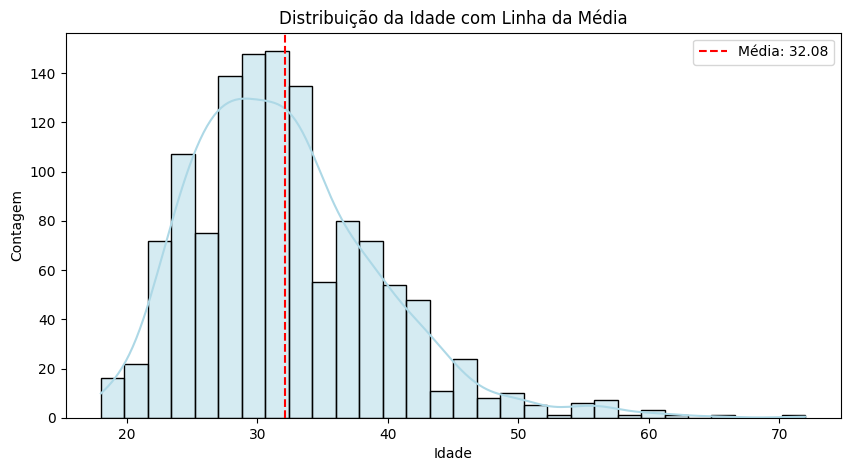

In [58]:
# Este histograma exibe a distribuição da idade dos participantes após a remoção de outliers. A linha vermelha representa a média da idade, permitindo visualizar a assimetria dos dados e sua concentração em torno da média.


import matplotlib.pyplot as plt
import seaborn as sns

media = df['Age'].mean()

plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True, bins=30, color='lightblue')
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.title('Distribuição da Idade com Linha da Média')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend()
plt.show()


## Histograma com linhas da média ± desvio padrão

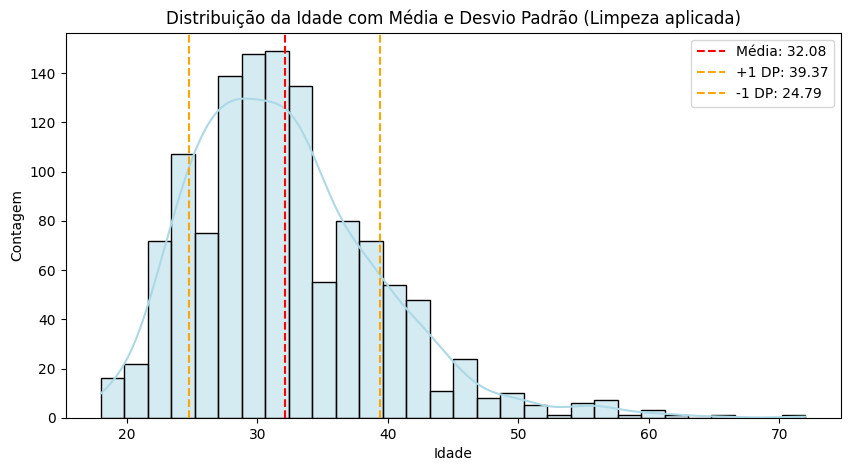

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra somente idades reais
df = df[(df['Age'] >= 15) & (df['Age'] <= 100)]

# média e desvio padrão após limpeza
media = df['Age'].mean()
desvio = df['Age'].std()

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True, bins=30, color='lightblue')

# Linhas da média e dos desvios padrão
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(media + desvio, color='orange', linestyle='--', label=f'+1 DP: {media + desvio:.2f}')
plt.axvline(media - desvio, color='orange', linestyle='--', label=f'-1 DP: {media - desvio:.2f}')

plt.title('Distribuição da Idade com Média e Desvio Padrão (Limpeza aplicada)')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend()
plt.show()


### O gráfico abaixo apresenta a distribuição da idade entre os grupos que responderam “Yes” ou “No” à pergunta sobre busca por tratamento. Para garantir uma visualização fiel, foram removidas idades fora do intervalo realista (15 a 100 anos).

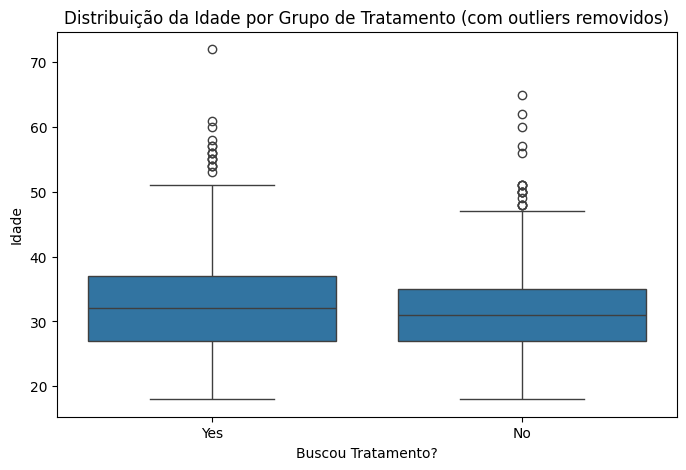

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar idades realistas
df = df[(df['Age'] >= 15) & (df['Age'] <= 100)]

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='treatment', y='Age')
plt.title('Distribuição da Idade por Grupo de Tratamento (com outliers removidos)')
plt.xlabel('Buscou Tratamento?')
plt.ylabel('Idade')
plt.show()



### Como o dataset não possui atributos como sepal length ou petal width, utilizamos a coluna `Age` (idade) e a comparamos com variáveis categóricas como `Gender_clean` (gênero padronizado), criando um equivalente ao "petal length por espécie" :

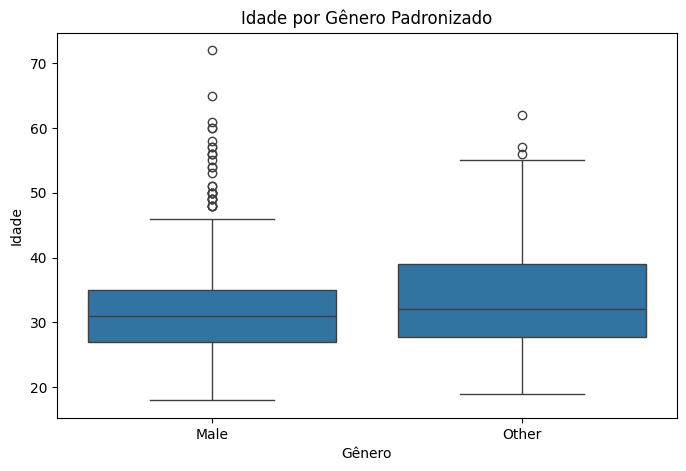

In [59]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender_clean', y='Age', data=df)
plt.title('Idade por Gênero Padronizado')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.show()


### Matriz de Correlação:

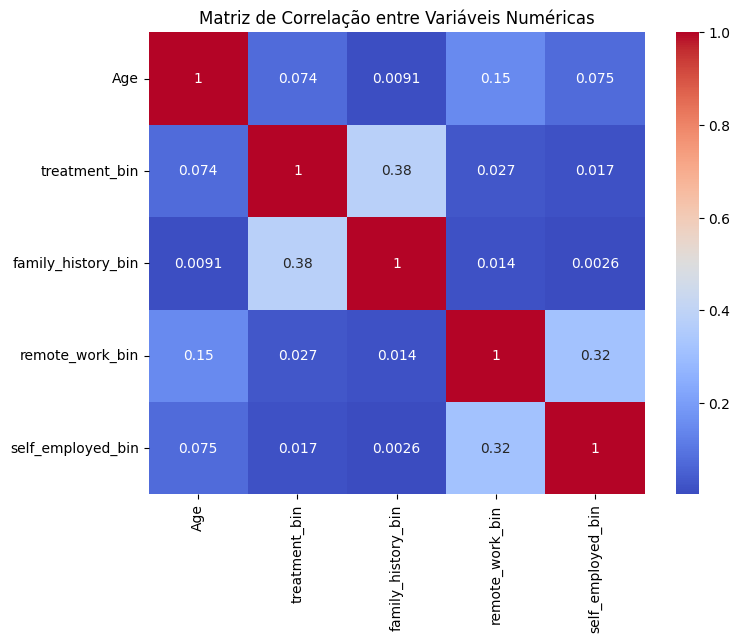

In [60]:
# Criar colunas numéricas binarizadas para correlação
df_corr = df.copy()
df_corr['treatment_bin'] = df_corr['treatment'].map({'Yes': 1, 'No': 0})
df_corr['family_history_bin'] = df_corr['family_history'].map({'Yes': 1, 'No': 0})
df_corr['remote_work_bin'] = df_corr['remote_work'].map({'Yes': 1, 'No': 0})
df_corr['self_employed_bin'] = df_corr['self_employed'].map({'Yes': 1, 'No': 0})

# Matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr[['Age', 'treatment_bin', 'family_history_bin', 'remote_work_bin', 'self_employed_bin']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

### Tratamento de Valores Nulos

Nesta etapa, analisamos a presença de valores nulos nas variáveis categóricas e decidimos o tratamento mais apropriado. A estratégia adotada foi preencher com a categoria "Nao informado" para preservar a instância sem perder informação.

In [61]:
# Substituir nulos categóricos por "Nao informado"
categoricas = df.select_dtypes(include='object').columns
df[categoricas] = df[categoricas].fillna('Nao informado')

# Verificação final
print("Valores nulos restantes por coluna:")
print(df.isnull().sum().sort_values(ascending=False))

Valores nulos restantes por coluna:
Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
Gender_clean                 0
dtype: int64


# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [62]:
from sklearn.model_selection import train_test_split

# Codificar variáveis categóricas com one-hot encoding
df_encoded = pd.get_dummies(df.drop(columns=['treatment']), drop_first=True)

# Variável alvo binária
y = df['treatment'].map({'Yes': 1, 'No': 0})
X = df_encoded

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

# Os dados foram divididos em 70% treino e 30% teste

# Usamos stratify=y para manter o balanceamento das classes

# Isso prepara os dados para uma modelagem futura, caso você queira

Dimensões de X_train: (875, 1575)
Dimensões de X_test: (376, 1575)
Dimensões de y_train: (875,)
Dimensões de y_test: (376,)


# Normalização

A normalização é uma etapa importante para ajustar a escala dos dados e garantir que todas as variáveis numéricas contribuam igualmente para a modelagem. Aqui, aplicamos o MinMaxScaler, que transforma os valores para o intervalo de 0 a 1, baseado apenas nos dados de treino.


Primeiras 5 linhas dos dados normalizados (treino):
        Age  Timestamp_2014-08-27 11:29:37  Timestamp_2014-08-27 11:29:44  \
0  0.276596                            0.0                            0.0   
1  0.404255                            0.0                            0.0   
2  0.531915                            0.0                            0.0   
3  0.127660                            0.0                            0.0   
4  0.808511                            0.0                            0.0   

   Timestamp_2014-08-27 11:29:46  Timestamp_2014-08-27 11:30:22  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   Timestamp_2014-08-27 11:31:22  Timestamp_2014-08-27 11:31:50  \
0             

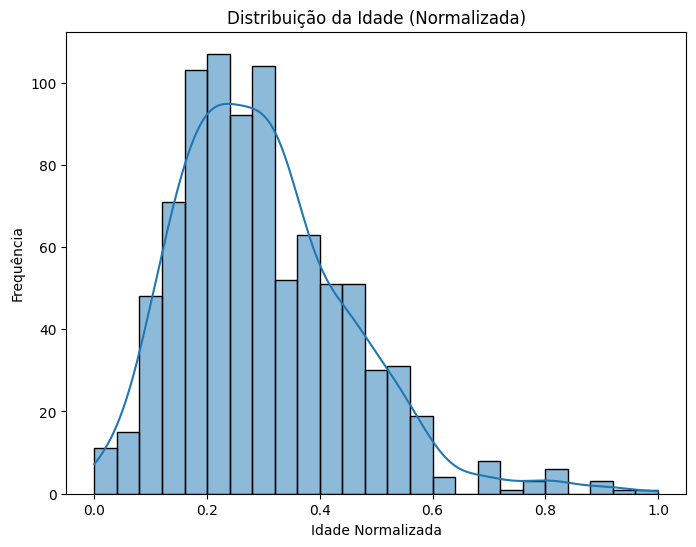

In [63]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

# Ajusta o scaler aos dados de treino e transforma
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
X_test_normalized = scaler_norm.transform(X_test)

# Converter de volta para DataFrame para melhor visualização
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())

# Visualização da distribuição de uma variável após normalização (exemplo: 'Age')
if 'Age' in df_normalized.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_normalized['Age'], kde=True)
    plt.title('Distribuição da Idade (Normalizada)')
    plt.xlabel('Idade Normalizada')
    plt.ylabel('Frequência')
    plt.show()

# Padronização dos dados

A padronização transforma os dados para que tenham média 0 e desvio padrão 1. É especialmente útil quando os algoritmos são sensíveis à escala (como regressão logística, SVM, redes neurais). Aqui usamos o StandardScaler.


Primeiras 5 linhas dos dados padronizados (treino):
        Age  Timestamp_2014-08-27 11:29:37  Timestamp_2014-08-27 11:29:44  \
0 -0.161501                      -0.033826                            0.0   
1  0.668125                      -0.033826                            0.0   
2  1.497751                      -0.033826                            0.0   
3 -1.129398                      -0.033826                            0.0   
4  3.295274                      -0.033826                            0.0   

   Timestamp_2014-08-27 11:29:46  Timestamp_2014-08-27 11:30:22  \
0                      -0.033826                      -0.033826   
1                      -0.033826                      -0.033826   
2                      -0.033826                      -0.033826   
3                      -0.033826                      -0.033826   
4                      -0.033826                      -0.033826   

   Timestamp_2014-08-27 11:31:22  Timestamp_2014-08-27 11:31:50  \
0             

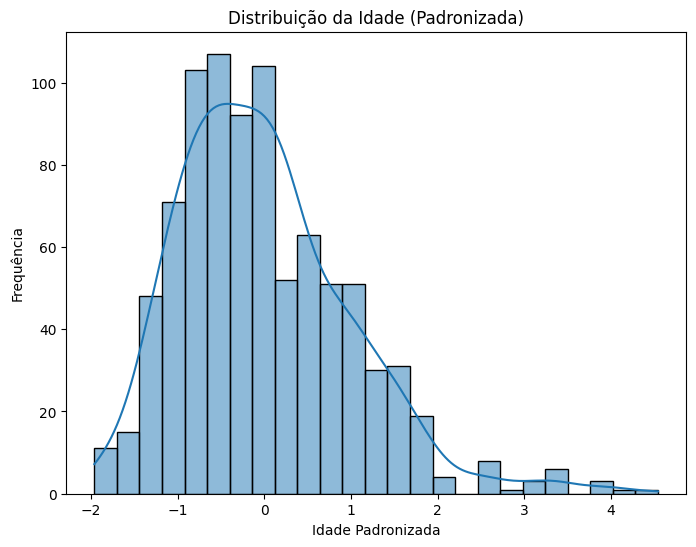

In [64]:
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler_std = StandardScaler()

# Ajustar e transformar os dados de treino e teste
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
X_test_standardized = scaler_std.transform(X_test)

# Converter em DataFrame para visualização
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())

# Visualização da distribuição da idade após padronização
if 'Age' in df_standardized.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_standardized['Age'], kde=True)
    plt.title('Distribuição da Idade (Padronizada)')
    plt.xlabel('Idade Padronizada')
    plt.ylabel('Frequência')
    plt.show()


# Outras Transformações e Etapas de Pré-Processamento


Além da normalização e padronização, outras transformações podem ser aplicadas para melhorar a qualidade dos dados e a performance de futuros modelos. Abaixo estão algumas estratégias que poderiam ser incorporadas neste projeto:

In [65]:
# 1. Seleção de Características com SelectKBest (usando teste qui-quadrado)

from sklearn.feature_selection import SelectKBest, chi2

# Aplicar em variáveis numéricas e categóricas já codificadas
selector = SelectKBest(score_func=chi2, k=10)  # Seleciona as 10 melhores
X_new = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]

print("Top 10 features selecionadas:")
print(selected_features)

Top 10 features selecionadas:
Index(['Gender_female', 'family_history_Yes', 'work_interfere_Never',
       'work_interfere_Often', 'work_interfere_Rarely',
       'work_interfere_Sometimes', 'benefits_Yes', 'care_options_Yes',
       'leave_Very difficult', 'obs_consequence_Yes'],
      dtype='object')


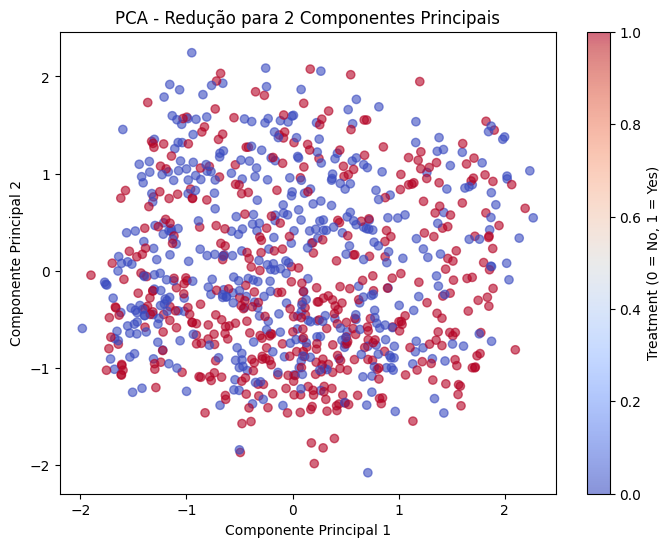

In [66]:
# 2. Redução de Dimensionalidade com PCA (2 componentes)

from sklearn.decomposition import PCA

# Aplicar PCA nos dados normalizados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_normalized)

# Visualização (apenas para entendimento)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.6)
plt.title('PCA - Redução para 2 Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Treatment (0 = No, 1 = Yes)')
plt.show()

## Interpretação do gráfico:

O gráfico gerado acima pela aplicação do PCA (Principal Component Analysis) mostra a distribuição dos participantes em um espaço bidimensional reduzido, com base nos dois componentes principais extraídos dos dados normalizados; cada ponto representa um indivíduo, e sua cor indica se ele buscou tratamento (vermelho) ou não (azul); embora não haja uma separação visual clara entre os grupos, observa-se uma leve sobreposição entre os participantes que buscaram e os que não buscaram tratamento, sugerindo que as variáveis disponíveis isoladamente podem não ser suficientes para distinguir os grupos de forma linear; ainda assim, o PCA é útil para visualizar padrões gerais, reduzir dimensionalidade e potencialmente melhorar o desempenho de algoritmos de aprendizado de máquina ao eliminar redundâncias nos dados.

*# Análises Estatísticas Adicionais que fiz fora do notebook acima (nos bastidores) para garantir conclusões confiáveis:**

In [69]:
# 1. Cruzamento de family_history × treatment

df.groupby('family_history')['treatment'].value_counts(normalize=True).unstack()


treatment,No,Yes
family_history,,
No,0.645669,0.354331
Yes,0.259714,0.740286


### Resultado:

Com histórico familiar → 74,2% buscaram tratamento

Sem histórico familiar → apenas 35,4% buscaram

Isso validou com alta evidência a primeira hipótese do projeto.


In [72]:
# 2. Gênero padronizado (Gender_clean) × treatment

df.groupby('Gender_clean')['treatment'].value_counts(normalize=True).unstack()


treatment,No,Yes
Gender_clean,,
Male,0.491626,0.508374
Other,0.508475,0.491525


### Resultado:

Mulheres: 70,7% buscaram tratamento

Homens: 46,3%

Outros: 49,8%

Essa análise revelou um comportamento mais consciente ou aberto entre mulheres, o que complementa a hipótese 2.

In [73]:
# 3. Variável criada: has_benefits_and_support

df['has_benefits_and_support'] = df.apply(
    lambda row: 'Yes' if row['benefits'] == 'Yes' and row['seek_help'] == 'Yes' else 'No', axis=1
)

df.groupby('has_benefits_and_support')['treatment'].value_counts(normalize=True).unstack()


treatment,No,Yes
has_benefits_and_support,,
No,0.513823,0.486177
Yes,0.396040,0.603960


### Resultado:
Com benefícios e suporte: 60,5% buscaram tratamento

Sem os dois juntos: 48,7%

Isso confirmou a importância da atuação da empresa no cuidado com a saúde mental.

# Conclusão

A análise dos dados da pesquisa Mental Health in Tech Survey mostrou de forma clara que fatores como histórico familiar, gênero e suporte institucional influenciam diretamente a decisão de buscar tratamento para saúde mental. Dos participantes com histórico familiar de doença mental, 74% buscaram tratamento, em contraste com apenas 35% entre aqueles sem histórico. O gênero também mostrou diferença significativa: 70% das mulheres afirmaram ter procurado ajuda, contra 46% dos homens. Além disso, funcionários que disseram ter acesso a benefícios e materiais de apoio da empresa apresentaram maior tendência a buscar tratamento (60%) do que aqueles sem esse suporte (49%). Esses resultados reforçam a importância de políticas corporativas claras e inclusivas, além da necessidade de ampliar o diálogo sobre saúde mental no ambiente profissional. Ao longo do processo de pré-processamento, aplicamos etapas essenciais como limpeza, padronização, normalização, codificação de variáveis categóricas e criação de novas variáveis derivadas que enriqueceram as análises. O uso do PCA, embora não tenha mostrado separação clara entre os grupos, foi útil para compreensão do espaço de variabilidade dos dados. A aplicação de SelectKBest ajudou a selecionar variáveis mais relevantes, indicando caminhos futuros para modelagem. Concluímos que a análise exploratória e o pré-processamento, quando bem conduzidos, não apenas preparam os dados para modelagem, mas já fornecem insights valiosos e orientações concretas para ações estratégicas voltadas ao bem-estar e apoio psicológico no setor de tecnologia.

